In [2]:
import pandas as pd
import sqlite3 as sq
import numpy as np
from datetime import datetime as dt
from utils.betting import load_current_line, load_unabated_current
pd.set_option("display.precision", 3)


In [3]:

today = dt.today()
year = today.year
month = today.month
day = today.day
today_str = f'{year}_{month}_{day}'
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 21)
pd.set_option('display.precision', 3)

pp_path = f'../Lines/pp/pp_{today_str}.parquet'
unabated_path = f'../Lines/unabated/unabated_{today_str}.parquet'
unabated = load_unabated_current(unabated_path, 'scrape_time', 'prop_id')
dk_path = f'../Lines/dk/dk_{today_str}.parquet'
dk = load_current_line(dk_path, 'scrape_time', 'prop_id')
pp_lines = load_current_line(pp_path, 'scrape_time', 'prop_id').drop_duplicates()
pp_lines = pp_lines.loc[
	pp_lines.league_id.isin([9])].reset_index(drop=True)

player_info = pd.read_csv('../reference_data/NFL/player_info.csv',index_col=0)
player_info = player_info.loc[player_info.year==2024]
pp = pp_lines.merge(player_info[['player','FantPos']],how='left')
pp_lines.scrape_time.max()

Timestamp('2024-10-17 10:40:00-0500', tz='US/Central')

In [5]:
dk['stat'] = dk['stat'].replace(
{'Player Not to Score a Touchdown': 'Rush+Rec TDs',
 'Rush + Rec TDs':'Rush+Rec TDs',
 'Score 2 or More': 'Rush+Rec TDs',
  'Anytime TD Scorer' : 'Rush+Rec TDs',
  'Anytime Touchdown Scorer' : 'Rush+Rec TDs',
  'Interceptions Thrown': 'INT',
  'Passing Yards': 'Pass Yards',
  'Passing Touchdowns': 'Pass TDs',
  'Rushing Yards':'Rush Yards',

   })
dk = dk.rename({'american_odds':'odds'},axis=1)

In [9]:
dk['outcomeType'].value_counts()

outcomeType
Over                  1271
Under                 1271
Anytime Scorer         957
First Scorer           777
To Score 2 Or More     361
Yes                    212
Last Scorer            206
No                     199
To Score 3 Or More     155
Home                   153
Away                   153
Tie                     28
Name: count, dtype: int64

In [14]:
overs = dk.loc[dk.outcomeType=='Over']
under = dk.loc[dk.outcomeType=='Under']

In [20]:
comb = overs.merge(under, on = ['eventId',
       'stat', 'line', 'player', 'home', 'away', 'event_time', 'alt_line',
       'scrape_time', 'date', 'prop_id', 'event_id', 'league_name'], suffixes=['_o','_u'])
comb

,side_o,decimal_odds_o,outcomeType_o,odds_o,eventId,name_o,stat,line,player,home,...,date,prop_id,event_id,league_name,side_u,decimal_odds_u,outcomeType_u,odds_u,name_u,prob_u
0,over,1.312,Over,−320,30568772,DeVon Achane Alt Rushing Yards O/U,Rush Yards,30.5,DeVon Achane,IND,...,2024-10-20 00:00:00-05:00,ab767fa6-a,c2c04b9d-a,NFL,under,3.450,Under,+245,DeVon Achane Alt Rushing Yards O/U,0.290
1,over,1.465,Over,−215,30568772,Tyler Huntley Passing Touchdowns O/U,Pass TDs,0.5,Tyler Huntley,IND,...,2024-10-20 00:00:00-05:00,b020692b-2,c2c04b9d-a,NFL,under,2.650,Under,+165,Tyler Huntley Passing Touchdowns O/U,0.377
2,over,1.370,Over,−270,30568772,Anthony Richardson Passing Touchdowns O/U,Pass TDs,0.5,Anthony Richardson,IND,...,2024-10-20 00:00:00-05:00,ad6ff877-5,c2c04b9d-a,NFL,under,3.000,Under,+200,Anthony Richardson Passing Touchdowns O/U,0.333
3,over,1.870,Over,−115,30568772,Anthony Richardson Passing Yards O/U,Pass Yards,193.5,Anthony Richardson,IND,...,2024-10-20 00:00:00-05:00,c2d1a03d-6,c2c04b9d-a,NFL,under,1.870,Under,−115,Anthony Richardson Passing Yards O/U,0.535
4,over,1.833,Over,−120,30568772,Tyler Huntley Passing Yards O/U,Pass Yards,181.5,Tyler Huntley,IND,...,2024-10-20 00:00:00-05:00,3ca9a7ac-d,c2c04b9d-a,NFL,under,1.909,Under,−110,Tyler Huntley Passing Yards O/U,0.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,over,1.870,Over,−115,30568832,Tyler Lockett Rushing + Receiving Yards O/U,Rushing + Receiving Yards,46.5,Tyler Lockett,ATL,...,2024-10-20 00:00:00-05:00,fcf805fa-f,f016798e-3,NFL,under,1.870,Under,−115,Tyler Lockett Rushing + Receiving Yards O/U,0.535
1267,over,1.909,Over,−110,30568832,Jaxon Smith-Njigba Rushing + Receiving Yards O/U,Rushing + Receiving Yards,51.5,Jaxon Smith-Njigba,ATL,...,2024-10-20 00:00:00-05:00,77e2314f-e,f016798e-3,NFL,under,1.833,Under,−120,Jaxon Smith-Njigba Rushing + Receiving Yards O/U,0.545
1268,over,1.870,Over,−115,30568832,Darnell Mooney Rushing + Receiving Yards O/U,Rushing + Receiving Yards,56.5,Darnell Mooney,ATL,...,2024-10-20 00:00:00-05:00,252a3340-3,f016798e-3,NFL,under,1.870,Under,−115,Darnell Mooney Rushing + Receiving Yards O/U,0.535
1269,over,1.870,Over,−115,30568832,Drake London Rushing + Receiving Yards O/U,Rushing + Receiving Yards,74.5,Drake London,ATL,...,2024-10-20 00:00:00-05:00,fd4a36b7-8,f016798e-3,NFL,under,1.870,Under,−115,Drake London Rushing + Receiving Yards O/U,0.535


In [25]:
from utils.betting import prob2american

comb['fair'] = comb['prob_o'] / (comb['prob_o'] + comb['prob_u'])
comb['fair_odds'] = comb['fair'].apply(lambda x: round(prob2american(x)))

In [52]:
ach = comb.loc[(comb.player=='Alvin Kamara') & (comb.stat=='Rush Yards')].sort_values(by='line')
ach

,side_o,decimal_odds_o,outcomeType_o,odds_o,eventId,name_o,stat,line,player,home,...,event_id,league_name,side_u,decimal_odds_u,outcomeType_u,odds_u,name_u,prob_u,fair,fair_odds
179,over,1.333,Over,−300,30568675,Alvin Kamara Alt Rushing Yards O/U,Rush Yards,50.5,Alvin Kamara,NO,...,d587cc6d-2,NFL,under,3.350,Under,+235,Alvin Kamara Alt Rushing Yards O/U,0.299,0.715,-251
174,over,1.606,Over,−165,30568675,Alvin Kamara Alt Rushing Yards O/U,Rush Yards,60.5,Alvin Kamara,NO,...,d587cc6d-2,NFL,under,2.300,Under,+130,Alvin Kamara Alt Rushing Yards O/U,0.435,0.589,-143
168,over,1.909,Over,−110,30568675,Alvin Kamara Rushing Yards O/U,Rush Yards,68.5,Alvin Kamara,NO,...,d587cc6d-2,NFL,under,1.833,Under,−120,Alvin Kamara Rushing Yards O/U,0.545,0.490,104
173,over,2.300,Over,+130,30568675,Alvin Kamara Alt Rushing Yards O/U,Rush Yards,75.5,Alvin Kamara,NO,...,d587cc6d-2,NFL,under,1.606,Under,−165,Alvin Kamara Alt Rushing Yards O/U,0.623,0.411,143
156,over,3.050,Over,+205,30568675,Alvin Kamara Alt Rushing Yards O/U,Rush Yards,85.5,Alvin Kamara,NO,...,d587cc6d-2,NFL,under,1.385,Under,−260,Alvin Kamara Alt Rushing Yards O/U,0.722,0.312,220


In [41]:
pd.merge_asof(ach, pp, on=['player','stat','line'])

MergeError: can only asof on a key for left

In [51]:
pp[['player','stat','line','alt_line']].merge(ach[['fair','player','line','stat']],how='right', on=['player','stat']).sort_values(by='fair')

,player,stat,line_x,alt_line,fair,line_y
0,Alvin Kamara,Rush Yards,99.5,demon,0.312,85.5
1,Alvin Kamara,Rush Yards,89.5,demon,0.312,85.5
2,Alvin Kamara,Rush Yards,49.5,goblin,0.312,85.5
3,Alvin Kamara,Rush Yards,79.5,demon,0.312,85.5
4,Alvin Kamara,Rush Yards,59.5,goblin,0.312,85.5
5,Alvin Kamara,Rush Yards,68.5,standard,0.312,85.5
17,Alvin Kamara,Rush Yards,68.5,standard,0.411,75.5
16,Alvin Kamara,Rush Yards,59.5,goblin,0.411,75.5
15,Alvin Kamara,Rush Yards,79.5,demon,0.411,75.5
13,Alvin Kamara,Rush Yards,89.5,demon,0.411,75.5


In [67]:
tiny = pp.loc[(pp.player=='Alvin Kamara') & (pp.stat=='Rush Yards')]
tiny

,player,team,line,alt_line,stat,opp,league_id,league_name,event_time,pp_player_id,date,scrape_time,prop_id,event_id,FantPos
907,Alvin Kamara,NO,99.5,demon,Rush Yards,DEN,9,NFL,2024-10-17 19:00:00-05:00,210976,2024-10-17 00:00:00-05:00,2024-10-17 10:40:00-05:00,afcef084-7,d587cc6d-2,RB
908,Alvin Kamara,NO,89.5,demon,Rush Yards,DEN,9,NFL,2024-10-17 19:00:00-05:00,210976,2024-10-17 00:00:00-05:00,2024-10-17 10:40:00-05:00,afcef084-7,d587cc6d-2,RB
909,Alvin Kamara,NO,49.5,goblin,Rush Yards,DEN,9,NFL,2024-10-17 19:00:00-05:00,210976,2024-10-17 00:00:00-05:00,2024-10-17 10:40:00-05:00,afcef084-7,d587cc6d-2,RB
910,Alvin Kamara,NO,79.5,demon,Rush Yards,DEN,9,NFL,2024-10-17 19:00:00-05:00,210976,2024-10-17 00:00:00-05:00,2024-10-17 10:40:00-05:00,afcef084-7,d587cc6d-2,RB
914,Alvin Kamara,NO,59.5,goblin,Rush Yards,DEN,9,NFL,2024-10-17 19:00:00-05:00,210976,2024-10-17 00:00:00-05:00,2024-10-17 10:40:00-05:00,afcef084-7,d587cc6d-2,RB
916,Alvin Kamara,NO,68.5,standard,Rush Yards,DEN,9,NFL,2024-10-17 19:00:00-05:00,210976,2024-10-17 00:00:00-05:00,2024-10-17 10:40:00-05:00,afcef084-7,d587cc6d-2,RB


In [89]:
import numpy as np

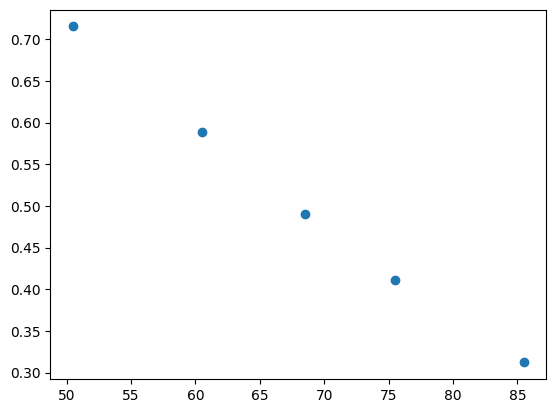

In [90]:
import matplotlib.pyplot as plt
plt.scatter(ach['line'], ach['fair'])